### Kod do chowania cellek

In [3]:
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)


hide_toggle()

### Kod do powiadomień

In [2]:
import jupyternotify
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)

<IPython.core.display.Javascript object>

### Kod do czytania danych

In [3]:
# %%notify

# '''Filtrowanie a następnie robienie obwiedni.'''
# X_truewords = np.empty((0,3,19,306))
# X_pseudowords = np.empty((0,3,19,306))
# for filename in os.listdir('.'):
#     if filename.endswith("exp1.set"):
#         f = mne.io.read_epochs_eeglab(filename)
#         syg = f.get_data()
#         X = np.zeros((syg.shape[0],3,19,306))
#         b_th , a_th = ss.butter(5, [0.1,8], btype='bandpass', analog=False, output='ba', fs=Fs)
#         b_al , a_al = ss.butter(5, [8,12], btype='bandpass', analog=False, output='ba', fs=Fs)
#         b_gm , a_gm = ss.butter(5, [12,30], btype='bandpass', analog=False, output='ba', fs=Fs)
#         X[:,0,:,:] = ss.filtfilt(b_th, a_th, syg, axis=-1)
#         X[:,1,:,:] = ss.filtfilt(b_al, a_al, syg, axis=-1)
#         X[:,2,:,:] = ss.filtfilt(b_gm, a_gm, syg, axis=-1)
#         obw = ss.hilbert(X,axis=-1)
#         X_truewords = np.concatenate((X_truewords, obw))
#     if filename.endswith("exp2.set"):
#         f = mne.io.read_epochs_eeglab(filename)
#         syg = f.get_data()
#         X = np.zeros((syg.shape[0],3,19,306))
#         b_th , a_th = ss.butter(5, [0.1,8], btype='bandpass', analog=False, output='ba', fs=Fs)
#         b_al , a_al = ss.butter(5, [8,12], btype='bandpass', analog=False, output='ba', fs=Fs)
#         b_gm , a_gm = ss.butter(5, [12,30], btype='bandpass', analog=False, output='ba', fs=Fs)
#         X[:,0,:,:] = ss.filtfilt(b_th, a_th, syg, axis=-1)
#         X[:,1,:,:] = ss.filtfilt(b_al, a_al, syg, axis=-1)
#         X[:,2,:,:] = ss.filtfilt(b_gm, a_gm, syg, axis=-1)
#         obw = ss.hilbert(X,axis=-1)
#         X_pseudowords = np.concatenate((X_pseudowords, obw))
hide_toggle()

In [4]:
# %%notify
# y_truewords = np.ones(X_truewords.shape[0])
# y_pseudowords = np.zeros(X_pseudowords.shape[0])
# X = np.concatenate((X_pseudowords, X_truewords))
# y = np.concatenate((y_pseudowords, y_truewords))
# np.save('Xobw', X)
# np.save('y', y)

hide_toggle()

### Importy

In [4]:
import os
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input
from keras.layers import LSTM, Conv2D,Conv2DTranspose
from keras.layers import Activation, Conv3D, Conv3DTranspose
from keras.layers import Dropout, MaxPooling2D, MaxPooling3D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.optimizers import RMSprop
from keras.utils import plot_model
from keras.utils import to_categorical
import tensorflow
import mne
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import scipy.signal as ss
from sklearn import preprocessing
import keras
from sklearn.model_selection import train_test_split
from keras.layers import ConvLSTM2D, BatchNormalization, SpatialDropout3D
Fs=256
CH_N = np.load("CH_N.npy")

hide_toggle()

In [5]:
'''Indeksy dla "najlepszych" kanałów'''

best_ind = [2,6,7,11]

### Czytanie X, y i Fs

In [6]:
X = np.load('X.npy') #Wczytanie wszystkie dane na surowo
# X_final = np.load('X_final.npy') #Dane z wyżej upakowane w 5 wymiarów (rozbite na pasma)
# Xnorm = np.load('Xnorm.npy') #Dane czytane po pacjencie i tak normalizowane
# XchNorm = np.load('XchNorm.npy') #Dane znormalizowane w obrębie pacjenta i kanału
# XchNorm_fin = np.load('XchNorm_fin.npy') #Dane znormalizowane w obrębie pacjenta i kanału, obrobione
# X_final = np.load('X_final.npy') #Dane jw upakowane w 5 wymiarów
# X3 = np.load('X3.npy') #uśrednione po 3 sztuki w obrębie pacjentów
# X3_fin = np.load('X3_fin.npy') #uśrednione po 3 sztuki w obrębie pacjentów, 4 best kanały, obrobionr
# Xbase_fin = np.load('Xbase_fin.npy') #uśrednione baseline_als i obrobione
# Xbase = np.load('X_baseline.npy')
# Xbase19_fin = np.load('Xbase19_fin.npy')
# y = np.load('y3.npy') #y dla jw
# Xobw = np.load('Xobw.npy')
# Xobw_fin = np.load('Xobw_fin.npy')

y = np.load('y.npy')
Fs = 256

hide_toggle()

In [24]:
%%notify
X = XchNorm_fin
X.shape

(18063, 5, 5, 306, 3)

<IPython.core.display.Javascript object>

In [7]:
hilbert = ss.hilbert(X, axis = -1)

obw_lfil_hilbert = np.abs(hilbert)
linstantaneous_phase = np.unwrap(np.angle(hilbert))
linstantaneous_frequency = (np.diff(linstantaneous_phase) /(2.0*np.pi) * Fs)

In [24]:
X = linstantaneous_phase

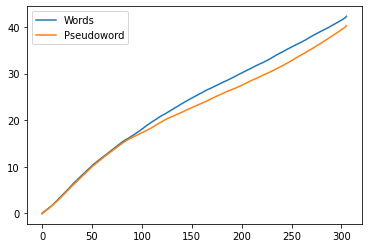

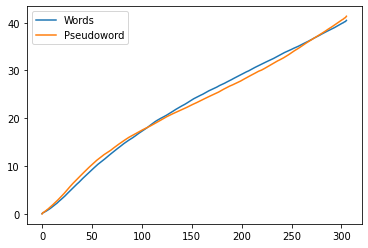

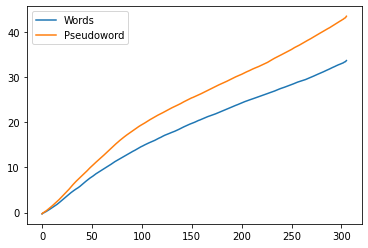

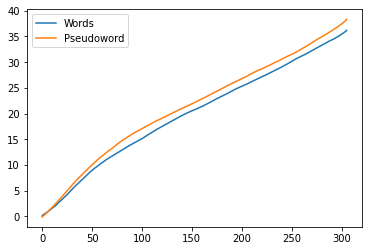

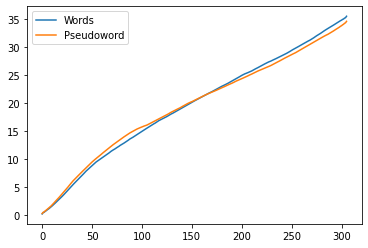

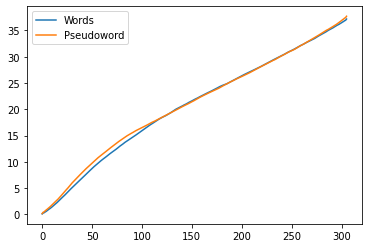

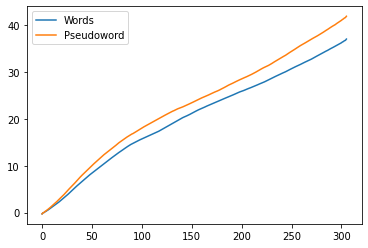

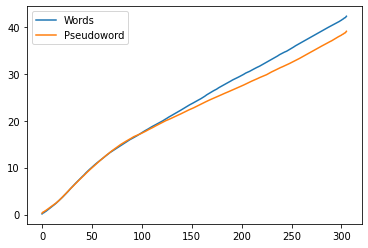

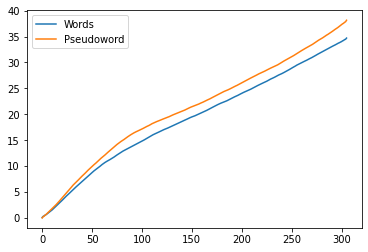

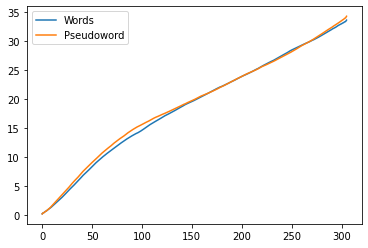

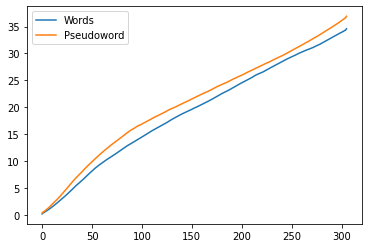

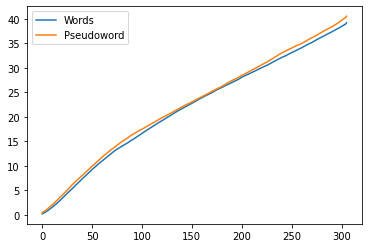

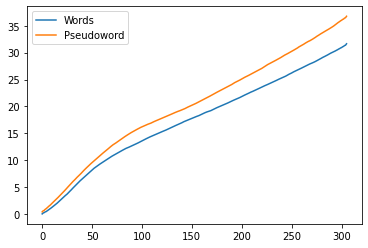

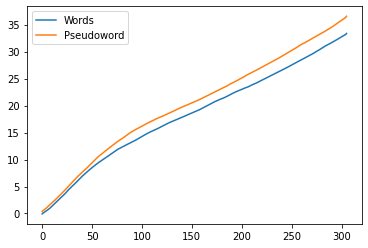

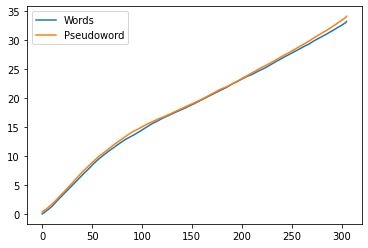

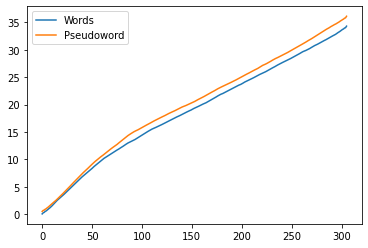

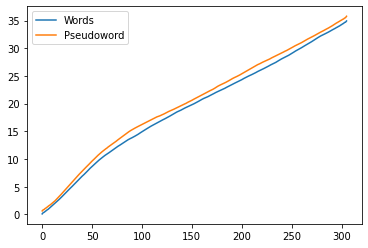

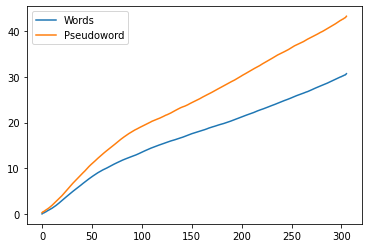

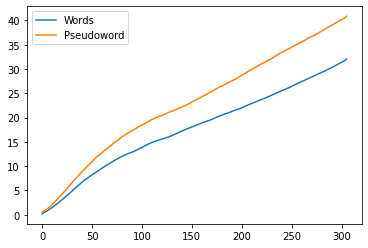

In [23]:

for ch in range(19):
    uno = np.mean(linstantaneous_phase[0:500,ch,:],axis = 0)
    due = np.mean(linstantaneous_phase[18063-500:,ch,:],axis=0)
    plt.plot(uno,label='Words')
    plt.plot(due,label="Pseudoword")
    plt.legend()
    plt.show()
# plt.plot(linstantaneous_frequency[0,0,:])
# plt.plot(linstantaneous_frequency[10,0,:])
# plt.plot(linstantaneous_frequency[100,0,:])
# plt.plot(linstantaneous_frequency[1000,0,:])

### Obróbka danych X do "obrazków" z 3 "kolorami" (pasma)

Przestrzenne ukłdanie kanałów

In [9]:
# X10_20 = np.zeros((X.shape[0],2,2,X.shape[2]))
# X10_20[:,0,0,:] = X[:,best_ind[0],:]
# X10_20[:,0,1,:] = X[:,best_ind[1],:]
# X10_20[:,1,0,:] = X[:,best_ind[2],:]
# X10_20[:,1,1,:] = X[:,best_ind[3],:]

hide_toggle()

In [25]:
X10_20 = np.zeros((X.shape[0],5,5,X.shape[-1]))
X10_20[:,0,1,:] = X[:,0,:]
X10_20[:,0,3,:] = X[:,1,:]
X10_20[:,1,:,:] = X[:,2:7,:]
X10_20[:,2,:,:] = X[:,7:12,:]
X10_20[:,3,:,:] = X[:,12:17,:]
X10_20[:,4,1,:] = X[:,17,:]
X10_20[:,4,3,:] = X[:,18,:]

hide_toggle()

Dane dla przypadku gdy nie rozbijamy na pasma

In [21]:
b , a = ss.butter(5, [0.5,12], btype='bandpass', analog=False, output='ba', fs=Fs)
X = ss.filtfilt(b,a,X10_20,axis=-1)
X_prim = np.zeros((X.shape[0],5,5,X.shape[-1],1))
X_prim[:,:,:,:,0] = X
print(X_prim.shape)

hide_toggle()

(18063, 5, 5, 306, 1)


Filtrowanie

In [12]:
# X10_20 = X[:,:,:,:,0]
# b_th , a_th = ss.butter(5, [0.1,8], btype='bandpass', analog=False, output='ba', fs=Fs)
# b_al , a_al = ss.butter(5, [8,12], btype='bandpass', analog=False, output='ba', fs=Fs)
# b_gm , a_gm = ss.butter(5, [12,30], btype='bandpass', analog=False, output='ba', fs=Fs)
# X_theta = ss.filtfilt(b_th, a_th, X10_20, axis=-1)
# X_alpha = ss.filtfilt(b_al, a_al, X10_20, axis=-1)
# X_gamma = ss.filtfilt(b_gm, a_gm, X10_20, axis=-1)

hide_toggle()

(6060, 2, 2, 306, 3)

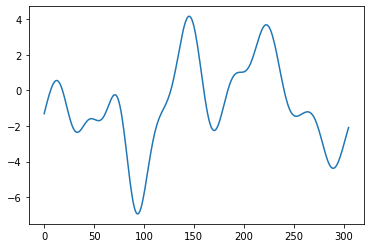

In [17]:
# X = X*10
plt.plot(X[6000,0,0,:,0])
X.shape

Wkładanie danych do jednej macierzy

In [14]:
# %%notify
# X_final = np.zeros((X.shape[0],5,5,X.shape[2],3))
# X_final[:,:,:,:,0] = X_theta
# X_final[:,:,:,:,1] = X_alpha
# X_final[:,:,:,:,2] = X_gamma
# np.save('Xobw_fin',X10_20)

hide_toggle()

### Resampling

In [15]:
# X_fin_resamp = np.empty((X_final.shape[0],X_final.shape[1],X_final.shape[2],X_final.shape[3]//4,X_final.shape[4]))
# for i in range(len(CH_N)+6):
#     for j in range(3):
#         for ind,signal in enumerate(X_final[:,i//5,i%5,:,j]):
#             X_fin_resamp[ind,i//5,i%5,:,j] = ss.resample(signal,X_final.shape[3]//4)
            
hide_toggle()

# Zestaw #2 - nieresamplowane

In [28]:
X10_20.shape
X = np.zeros((18063, 1, 5, 5, 306))
X[:,0,:,:,:] = X10_20
X.shape

(18063, 1, 5, 5, 306)

In [30]:
# X = X_prim
y2 = to_categorical(y).astype(np.integer)
X.shape

(18063, 1, 5, 5, 306)

In [31]:
X_final1=np.einsum('ijklm->imklj',X)

# ind1 = np.array(indeksy)
# ind1 = np.random.randint(0,X_final1.shape[0],6000)
# ind1 = cool_ind
# ind1 = np.arange(X_final1.shape[0])
# np.random.shuffle(ind1)
# X_final1 = X_final1[ind1]
# y1 = y2[ind1]
y1=y2

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X_final1, y1, test_size=0.2, random_state=69)
print(f'Rozmiar danych treningowych: X = {X_train1.shape}, y = {y_train1.shape}')
print(f'Rozmiar danych wejściowych = {X_final1.shape}')


hide_toggle()

Rozmiar danych treningowych: X = (14450, 306, 5, 5, 1), y = (14450, 2)
Rozmiar danych wejściowych = (18063, 306, 5, 5, 1)


# MEINE


if data_format='channels_first' 5D tensor with shape: (samples, time, channels, rows, cols)

Train on 11560 samples, validate on 2890 samples
Epoch 1/30
11560/11560 [==============================] - 30s 3ms/step - loss: 6.9936 - accuracy: 0.5069 - val_loss: 7.5677 - val_accuracy: 0.5066
Epoch 2/30
11560/11560 [==============================] - 28s 2ms/step - loss: 7.6031 - accuracy: 0.5056 - val_loss: 7.5677 - val_accuracy: 0.5066
Epoch 3/30
11560/11560 [==============================] - 27s 2ms/step - loss: 7.6031 - accuracy: 0.5056 - val_loss: 7.5677 - val_accuracy: 0.5066
Epoch 4/30
11560/11560 [==============================] - 27s 2ms/step - loss: 7.6031 - accuracy: 0.5056 - val_loss: 7.5677 - val_accuracy: 0.5066
Epoch 5/30
11560/11560 [==============================] - 27s 2ms/step - loss: 7.6031 - accuracy: 0.5056 - val_loss: 7.5677 - val_accuracy: 0.5066
Epoch 6/30
11560/11560 [==============================] - 27s 2ms/step - loss: 7.6031 - accuracy: 0.5056 - val_loss: 7.5677 - val_accuracy: 0.5066
Epoch 7/30
11560/11560 [==============================] - 27s 2ms/ste

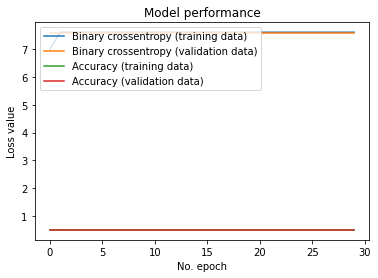

In [34]:
# %%notify
# del model

# Model configuration
batch_size = 1000
no_epochs = 30
learning_rate = 0.001
no_classes = 2
validation_spl = 0.2
verbosity = 1
sample_shape = X_train1.shape[1:]

# model = Sequential()
# model.add(ConvLSTM2D(filters = 20, kernel_size = (2,2), activation='sigmoid', dropout = 0.3, return_sequences = True, input_shape = sample_shape,data_format='channels_first'))
# model.add(BatchNormalization())
# # model.add(SpatialDropout3D(1))
# model.add(Dense(10, activation='tanh'))
# model.add(ConvLSTM2D(filters = 10, kernel_size = (1,1), activation='tanh', dropout = 0.5, return_sequences = True))
# model.add(BatchNormalization())
# model.add(Flatten())
# model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
# model.add(Dense(no_classes, activation='softmax'))

model = Sequential()
model.add(ConvLSTM2D(filters = 15, kernel_size = (1,1), activation='tanh', dropout = 0.4, return_sequences = True, input_shape = sample_shape,data_format='channels_last',recurrent_activation='hard_sigmoid'))
# model.add(BatchNormalization())
# model.add(SpatialDropout3D(1))
# model.add(Dense(10, activation='tanh'))
# model.add(ConvLSTM2D(filters = 20, kernel_size = (1,1), activation='tanh', dropout = 0.5, return_sequences = True))
# model.add(BatchNormalization())
model.add(Flatten())
# model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(no_classes, activation='softmax'))


# Compile the model
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

# Fit data to model
history = model.fit(X_train1, y_train1,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_spl)

# Generate generalization metrics
score = model.evaluate(X_test1, y_test1, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Plot history: Categorical crossentropy & Accuracy
plt.plot(history.history['loss'], label='Binary crossentropy (training data)')
plt.plot(history.history['val_loss'], label='Binary crossentropy (validation data)')
plt.plot(history.history['accuracy'], label='Accuracy (training data)')
plt.plot(history.history['val_accuracy'], label='Accuracy (validation data)')
plt.title('Model performance')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

hide_toggle()

In [19]:
# cool_ind = np.load('maybe_cool_ind.npy')

In [29]:
w = model.get_weights()

In [30]:
print(f'liczba warst = {len(w)}')
for no,warstwa in enumerate(w):
    print(f'rozmiar warstwy {no} = {warstwa.shape}')

liczba warst = 5
rozmiar warstwy 0 = (1, 1, 306, 60)
rozmiar warstwy 1 = (1, 1, 15, 60)
rozmiar warstwy 2 = (60,)
rozmiar warstwy 3 = (1125, 2)
rozmiar warstwy 4 = (2,)


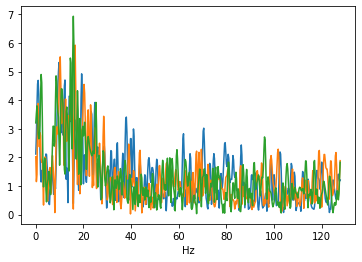

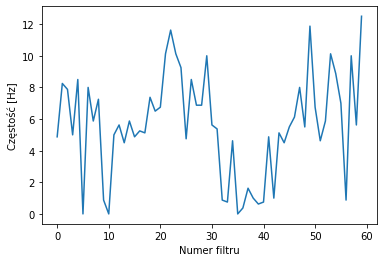

In [31]:
waga = w[0]
b = waga[0,0,:,0]
f, h0= ss.freqz(b, a=1, worN=512, whole=False,  fs=Fs)
b = waga[0,0,:,1]
f, h1= ss.freqz(b, a=1, worN=512, whole=False,  fs=Fs)
b = waga[0,0,:,2]
f, h2= ss.freqz(b, a=1, worN=512, whole=False,  fs=Fs)

plt.figure()
plt.plot(f, abs(h0))
plt.plot(f, abs(h1))
plt.plot(f, abs(h2))
plt.xlabel('Hz')
plt.show()

max_freqs=[]
for i in range(waga.shape[-1]):
    b = waga[0,0,:,i]
    f, h0 = ss.freqz(b, a=1, worN=512, whole=False,  fs=Fs)
    max_freqs.append(np.argmax(abs(h0))/8)
plt.plot(max_freqs)
plt.xlabel("Numer filtru")
plt.ylabel("Częstość [Hz]")
plt.show()

### Zabawy/testy na sinusach

Resamplowanie

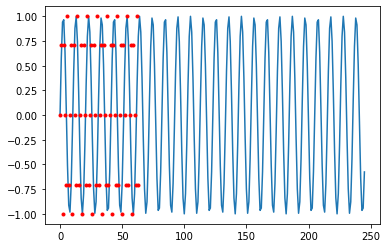

In [24]:
t = np.arange(0,1,1/246)
sinus = np.sin(2*np.pi*24*t)
down_sin = ss.resample(sinus,64)
plt.plot(sinus)
plt.plot(down_sin,'r.')
plt.show()

hide_toggle()

In [ ]:
sigg=sinus+np.sin(2*np.pi*16*t)
obw = ss.hilbert(sigg)
plt.plot(np.abs(obw))
# plt.show()
plt.plot(sigg)
plt.show()

for i in (1000,12000,8000,18000):
    sig_real = X_final[i,2,2,:,0]
    obw2 = ss.hilbert(sig_real)
    plt.title(y[i])
    plt.plot(np.abs(obw2),label='obw')
    # plt.show()
    plt.plot(sig_real, label='syg' )
    plt.legend()
    plt.show()
    
hide_toggle()